In [2]:
import sys
sys.path.append('..')

import cirq
import matplotlib.pyplot as plt

from daqec import graphs, circuits, passes

In [3]:

circ = cirq.Circuit()

qubits = cirq.LineQubit.range(3)
circ.append(cirq.X.on(qubits[0]))
circ.append(cirq.X.on(qubits[2]))
circ.append(cirq.CNOT(*qubits[:2]))
circ.append(cirq.CNOT(*qubits[1:]))

print(circ)

0: ───X───@───────
          │
1: ───────X───@───
              │
2: ───X───────X───


In [4]:
dag = circuits.circuit_to_dag(circ)

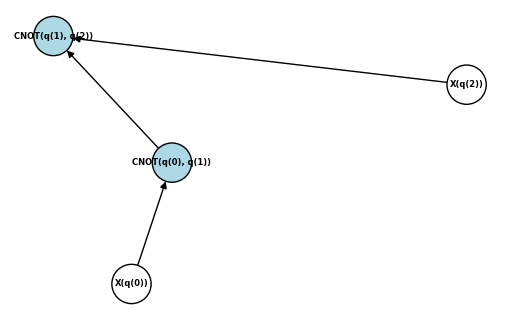

In [5]:
graphs.draw_circ_dag_mpl(dag, figsize=(5, 3))

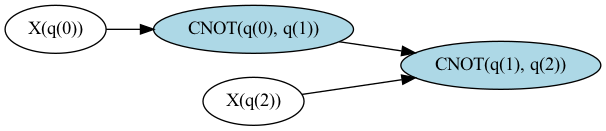

In [6]:
graphs.draw_circ_dag_graphviz(dag)


In [7]:
circuits.dag_to_circuit(dag)

0: ───X───@───────
          │
1: ───────X───@───
              │
2: ───X───────X───

In [8]:
dag_contracted = passes.contract_1q_gates_on_dag(dag)


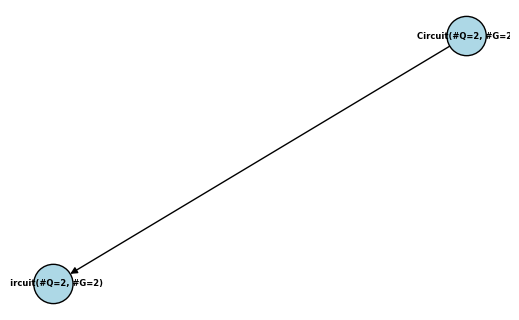

In [9]:
graphs.draw_circ_dag_mpl(dag_contracted, figsize=(5, 3))

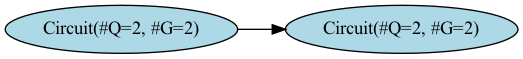

In [10]:
graphs.draw_circ_dag_graphviz(dag_contracted)

In [11]:
dag_contracted.nodes()[1]

0: ───X───@───
          │
1: ───────X───